In [4]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob
from math import frexp

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [5]:
tk1 = th.Thicket.from_caliperreader(glob("mpi_odd_even_cali/*.cali"))
tk2 = th.Thicket.from_caliperreader(glob("mpi_merge_cali/*.cali"))
tk3 = th.Thicket.from_caliperreader(glob("mpi_bitonic_cali/*.cali"))
tk4 = th.Thicket.from_caliperreader(glob("mpi_quicksort_cali/*.cali"))

In [6]:
gb1 = tk1.groupby(["InputSize", "InputType"])
gb2 = tk2.groupby(["InputSize", "InputType"])
gb3 = tk3.groupby(["InputSize", "InputType"])
gb4 = tk4.groupby(["InputSize", "InputType"])

28  thickets created...
{(65536, '1%perturbed'): <thicket.thicket.Thicket object at 0x2af80a3393d0>, (65536, 'random'): <thicket.thicket.Thicket object at 0x2af809c02250>, (65536, 'reverse_sorted'): <thicket.thicket.Thicket object at 0x2af80930eb80>, (65536, 'sorted'): <thicket.thicket.Thicket object at 0x2af8095da7f0>, (262144, '1%perturbed'): <thicket.thicket.Thicket object at 0x2af80a3b7220>, (262144, 'random'): <thicket.thicket.Thicket object at 0x2af809e801f0>, (262144, 'reverse_sorted'): <thicket.thicket.Thicket object at 0x2af80a272c70>, (262144, 'sorted'): <thicket.thicket.Thicket object at 0x2af80a4ac130>, (1048576, '1%perturbed'): <thicket.thicket.Thicket object at 0x2af80a493a60>, (1048576, 'random'): <thicket.thicket.Thicket object at 0x2af80a46b9d0>, (1048576, 'reverse_sorted'): <thicket.thicket.Thicket object at 0x2af80a39ae20>, (1048576, 'sorted'): <thicket.thicket.Thicket object at 0x2af809b91c70>, (4194304, '1%perturbed'): <thicket.thicket.Thicket object at 0x2af80a29f

In [7]:
ctk1 = th.Thicket.concat_thickets(
    thickets=list(gb1.values()),
    headers=list(gb1.keys()),
    axis="columns",
    metadata_key="num_procs"
)

ctk2 = th.Thicket.concat_thickets(
    thickets=list(gb2.values()),
    headers=list(gb2.keys()),
    axis="columns",
    metadata_key="num_procs"
)

ctk3 = th.Thicket.concat_thickets(
    thickets=list(gb3.values()),
    headers=list(gb3.keys()),
    axis="columns",
    metadata_key="num_procs"
)

ctk4 = th.Thicket.concat_thickets(
    thickets=list(gb4.values()),
    headers=list(gb4.keys()),
    axis="columns",
    metadata_key="num_procs"
)

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


In [8]:
num_vals = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]
types = ["1%perturbed", "random", "reverse_sorted", "sorted"]

ctk1.dataframe = ctk1.dataframe.reset_index().drop([("node", "")], axis = 1)
ctk1.dataframe = ctk1.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

for i in num_vals:
    for j in types:
        ctk1.dataframe = ctk1.dataframe.reset_index().drop(
            [ 
             ((i, j), "nid"), ((i, j), "spot.channel"), 
            ], axis=1)
        ctk1.dataframe = ctk1.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])
        
ctk2.dataframe = ctk2.dataframe.reset_index().drop([("node", "")], axis = 1)
ctk2.dataframe = ctk2.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

for i in num_vals:
    for j in types:
        ctk2.dataframe = ctk2.dataframe.reset_index().drop(
            [ 
             ((i, j), "nid"), ((i, j), "spot.channel"), 
            ], axis=1)
        ctk2.dataframe = ctk2.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])
    
ctk3.dataframe = ctk3.dataframe.reset_index().drop([("node", "")], axis = 1)
ctk3.dataframe = ctk3.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

for i in num_vals:
    for j in types:
        ctk3.dataframe = ctk3.dataframe.reset_index().drop(
            [ 
             ((i, j), "nid"), ((i, j), "spot.channel"), 
            ], axis=1)
        ctk3.dataframe = ctk3.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])
        
ctk4.dataframe = ctk4.dataframe.reset_index().drop([("node", "")], axis = 1)
ctk4.dataframe = ctk4.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

for i in num_vals:
    for j in types:
        ctk4.dataframe = ctk4.dataframe.reset_index().drop(
            [ 
             ((i, j), "nid"), ((i, j), "spot.channel"), 
            ], axis=1)
        ctk4.dataframe = ctk4.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

In [9]:
threads = sorted(list(set(ctk1.dataframe.index.get_level_values("num_procs"))))

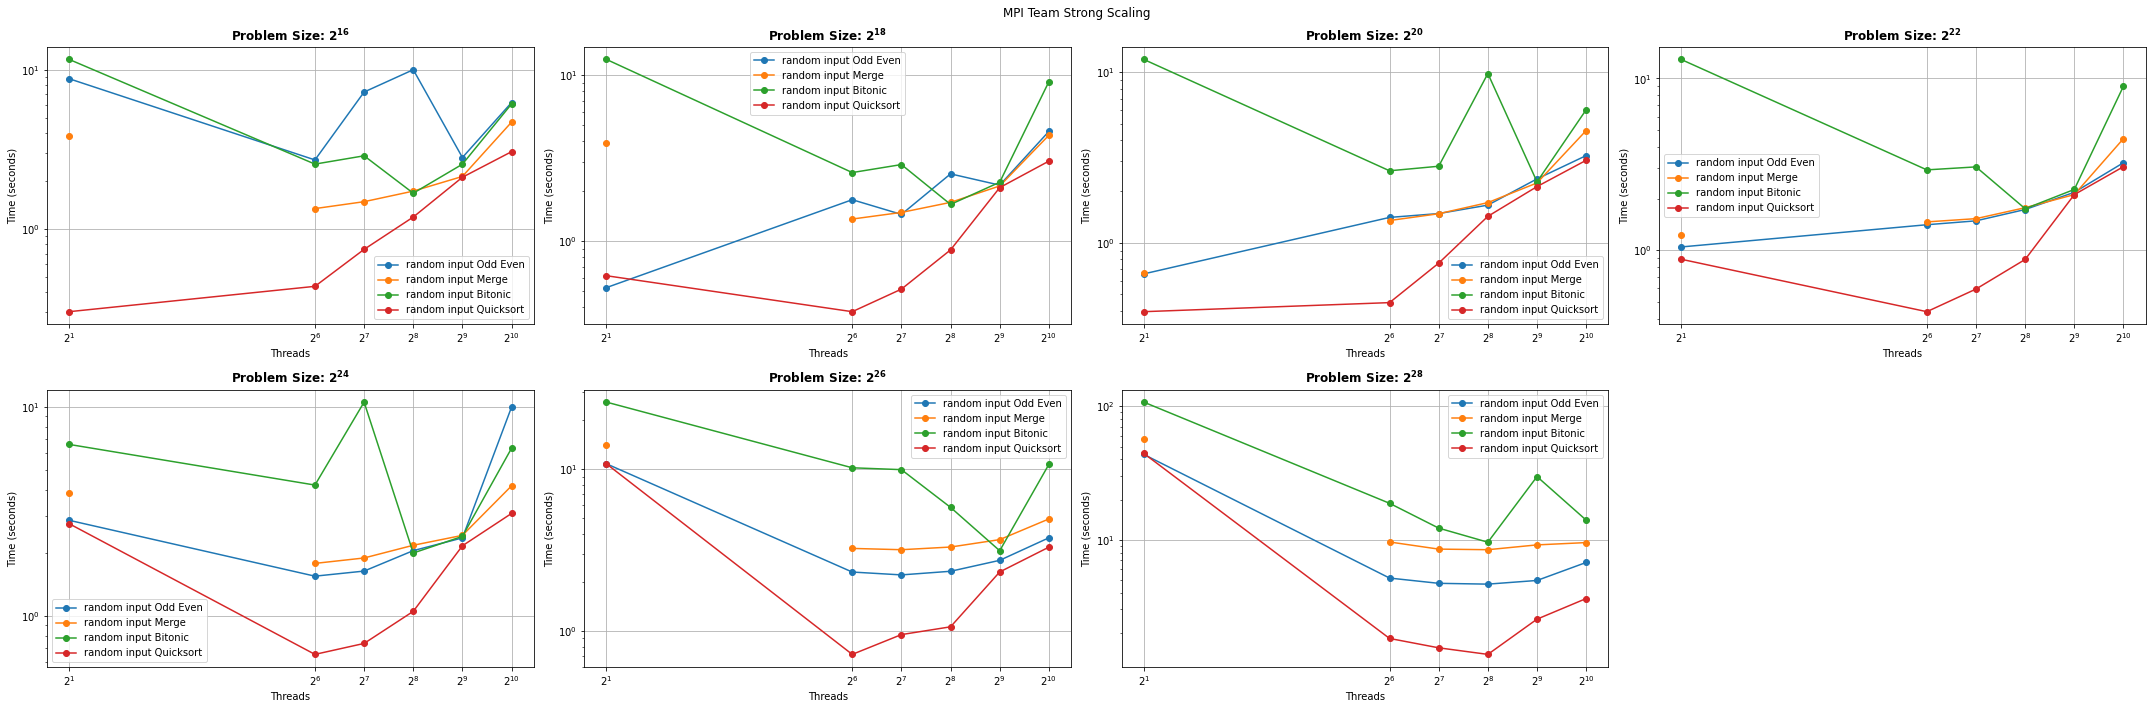

In [10]:
idx = pd.IndexSlice

fig, ax = plt.subplots(2, 4, figsize=(30, 10))
iter = 0

j = "random"

for i in num_vals: 
    ax[int(iter/4), iter%4].plot(
        ctk1.dataframe.loc['main', idx[((i, j),), "Avg time/rank"]],
        marker='o',
        label = j + " input Odd Even"
    )
    ax[int(iter/4), iter%4].plot(
        ctk2.dataframe.loc['main', idx[((i, j),), "Avg time/rank"]],
        marker='o',
        label = j + " input Merge"
    )
    ax[int(iter/4), iter%4].plot(
        ctk3.dataframe.loc['main', idx[((i, j),), "Avg time/rank"]],
        marker='o',
        label = j + " input Bitonic"
    )
    ax[int(iter/4), iter%4].plot(
        ctk4.dataframe.loc['main', idx[((i, j),), "Avg time/rank"]],
        marker='o',
        label = j + " input Quicksort"
    )
    ax[int(iter/4), iter%4].set_title(rf"Problem Size: $\mathregular{{2^{{{str(frexp(i)[1] - 1)}}}}}$", fontsize=12, weight='bold')
    ax[int(iter/4), iter%4].set_xlabel("Threads")
    ax[int(iter/4), iter%4].set_ylabel("Time (seconds)")
    ax[int(iter/4), iter%4].set_yscale("log", base=10)
    ax[int(iter/4), iter%4].set_xscale("log", base=2)
    ax[int(iter/4), iter%4].grid(True)
    ax[int(iter/4), iter%4].set_xticks(threads)
    ax[int(iter/4), iter%4].legend()    
    iter += 1
ax[-1, -1].axis('off')
plt.suptitle("MPI Team Strong Scaling")
fig.tight_layout()
plt.savefig("mpi_team_graph/strong_scaling.png")
plt.show()